# Assignment 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

### Datetime manipulations

The Data Wrangling course started on Monday 4 January 2021 at 9 am and will end on Friday 29 January at 5.15 pm. Calculate the duration of the course in minutes. Assign the value to the variable *duration*.


In [2]:
from datetime import datetime

# YOUR CODE HERE
start = datetime(2020, 1, 4, 9)
end = datetime(2020, 1, 29, 5, 15)
difference = end - start
duration = difference.total_seconds() / 60
# YOUR CODE ENDS HERE

In [3]:
print(duration)

35775.0


Below you will find the scheduled days of the course Data Wrangling. The values in the time series denote the number of contact hours spend on each lecture. Create a time series that calculates the cumulative sum of all the hours that you have spent on the course. Assign the cumulate sum on 25 January 2021 to the variable *cum_hours*.

In [4]:
from datetime import datetime
from pandas.tseries.offsets import *


dates = [datetime(2021, 1,  4), datetime(2021, 1,  5), datetime(2021, 1, 7),
         datetime(2021, 1, 11), datetime(2021, 1, 12), datetime(2021, 1, 14),
         datetime(2021, 1, 18), datetime(2021, 1, 19), datetime(2021, 1, 21),
         datetime(2021, 1, 26), datetime(2021, 1, 27), datetime(2021, 2, 28),
         datetime(2021, 1, 29)]
ts = pd.Series([2, 2, 1, 2, 2, 1, 2, 2, 1, 3, 3, 3, 3], index = dates)

# YOUR CODE HERE
ts_cum = pd.Series(np.cumsum(ts.values), index = dates)
cum_hours = ts_cum[:'2021-01-25'][-1]
# YOUR CODE ENDS HERE

In [5]:
print(cum_hours)

15


Suppose that you want to become a world-class expert in data wrangling. So, you decide to spent 2 hours learning data wrangling every Tuesday in 2021. As you have a lot of free time every first Wednesday of the month, you spent 3 hours learning data wrangling those days in 2021. Calculate how many hours you will spend learning in 2021. Assign that value to the variable *study_hours*.

In [6]:
from datetime import datetime

# YOUR CODE HERE
from datetime import timedelta
import calendar

TUESDAY_STUDYING_TIME_HRS = 2
WEDNESDAY_STUDYING_TIME_HRS = 3

start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)
tuesday_count = 0
wednesday_count = 0

for i in range(1, (end_date - start_date).days + 1):
    day = calendar.day_name[(start_date + timedelta(days=i)).weekday()]
    if day == "Tuesday":
        tuesday_count += 1
    elif day == "Wednesday":
        wednesday_count += 1

study_hours = (tuesday_count * TUESDAY_STUDYING_TIME_HRS + 
               wednesday_count * WEDNESDAY_STUDYING_TIME_HRS)
# YOUR CODE ENDS HERE

In [7]:
print(study_hours)

260


Generate all business days in 2021 that start at the first weekday of the month. Calculate how many of these days fall on the second day of the month. Assign that value to the variable *second_days*.

In [8]:
from datetime import datetime

# YOUR CODE HERE
from datetime import timedelta
import calendar

start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)
second_days = 0
    
for date in (start_date + timedelta(n) for n in range((end_date - start_date).days)):
    prev_date = (date - timedelta(1))
    
    day_int = date.weekday()
    prev_day_int = prev_date.weekday()
    
    if 0 <= day_int <= 4 and date.strftime("%d") == '02' and 5 <= prev_day_int <= 6:
        second_days += 1
# YOUR CODE ENDS HERE

In [9]:
print(second_days)

1


The first blood moon in 2021 will fall on 27 April 2021 at 05.31 am in Amsterdam. Calculate what  time it will be in Sydney (Australia) at that exact moment. Assign the answer to *bloodmoon*.

In [10]:
from datetime import datetime
import pytz

# YOUR CODE HERE
bloodmoon_date_ams = pytz.timezone('Europe/Amsterdam').localize(datetime(2021, 4, 27, 5, 31))
bloodmoon = bloodmoon_date_ams.astimezone(pytz.timezone('Australia/Sydney'))
# YOUR CODE ENDS HERE

In [11]:
print(bloodmoon)

2021-04-27 13:31:00+10:00


### Sales volumes

The file *volume.csv* contains sales volumes of different companies. Read the file, and calculate the mean sales volumes of each company in the year 2010. Assign the series to the variable *volumes2010*. 

In [12]:
file = 'volume.csv'

# YOUR CODE HERE
sales_df = pd.read_csv(file)
sales2010_df = sales_df[pd.to_datetime(sales_df['Unnamed: 0'], format='%Y-%m-%d %H:%M:%S').dt.year == 2010]

company_names = sales2010_df.columns.tolist()
company_names.pop(0)
company_names

volume2010_data = [sales2010_df[x].mean() for x in company_names]
volumes2010 = pd.Series(volume2010_data, index = company_names)
# YOUR CODE ENDS HERE

In [13]:
print(volumes2010)

AA      3.113912e+07
AAPL    2.140376e+07
GE      7.223856e+07
IBM     6.422816e+06
JNJ     1.214678e+07
MSFT    6.306716e+07
PEP     6.962504e+06
SPX     4.566245e+09
XOM     2.643224e+07
dtype: float64


In which year did the sales volume of Apple (*AAPL*) overtake the sales volume of Microsoft (*MSFT*)? Calculate the value and assign the timestamp to the variable *changeover*.

In [14]:
file = 'volume.csv'

# YOUR CODE HERE
sales_df = pd.read_csv(file)
changeover = ''

for index, row in sales_df.iterrows():
    if row['AAPL'] > row['MSFT']:
        changeover = row['Unnamed: 0']
        break
# YOUR CODE ENDS HERE

In [15]:
print(changeover)

1992-08-06 00:00:00


Format the date that you have found in a nicer way corresponding to the style dd/mm/yy. Thus, the day (dd), month (mm), and the year (yy) are formatted in 2 digits, separated by slashes. Assign the value to the variable *nicedate*.

In [16]:
# YOUR CODE HERE
nicedate = datetime.strptime(changeover, '%Y-%m-%d %H:%M:%S').strftime('%d/%m/%y')
# YOUR CODE ENDS HERE

In [17]:
print(nicedate)

06/08/92


Apple has to report every end of the year (31 December) what its current sales volume is (not cumulative!). Create a time series for every year with the sales volume listed for Apple (AAPL) on 31 December. If the data does not contain a record for this date, then take the last known value that this known prior to that date. Assign the time series to the variable *apple_report*.

In [18]:
# YOUR CODE HERE
apple_df = sales_df[['Unnamed: 0','AAPL']].copy()
apple_df['Unnamed: 0'] = pd.to_datetime(apple_df['Unnamed: 0'], format='%Y-%m-%d %H:%M:%S')
apple_df['year'] = apple_df['Unnamed: 0'].dt.year
apple_df = apple_df.groupby('year').tail(1)
apple_df.drop(columns=['year'], inplace=True)

years = apple_df['Unnamed: 0'].values
volume = apple_df['AAPL'].values
apple_report = pd.Series(volume, index = years)
# YOUR CODE ENDS HERE

In [19]:
print(apple_report)

1990-12-31     1593200.0
1991-12-31     4802000.0
1992-12-31     3302000.0
1993-12-31     5765200.0
1994-12-30     2616400.0
                 ...    
2007-12-31    19261900.0
2008-12-31    21697900.0
2009-12-31    12586100.0
2010-12-31     6911000.0
2011-10-14    20450000.0
Length: 22, dtype: float64


The volumes of Apple are highly fluctuating over time. You can clearly see that when you make a plot. It would be better to smooth out the sales volume by taking a moving average with a period of 200 days. Calculate the moving average of the sales volume and assign to the variable *apple_smooth*. Create a plot with the original time series and the smooth version of the time series.

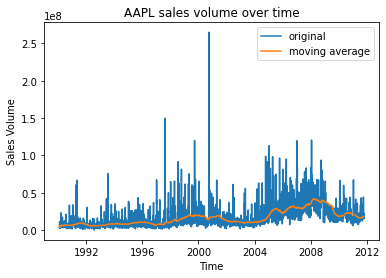

In [20]:
# YOUR CODE HERE
apple_df = sales_df[['Unnamed: 0','AAPL']].copy()
apple_df['Unnamed: 0'] = pd.to_datetime(apple_df['Unnamed: 0'], format='%Y-%m-%d %H:%M:%S')

apple_smooth = apple_df.copy()
apple_smooth['AAPL'] = apple_df.rolling(200, min_periods=1).mean()
apple_smooth = apple_smooth[['Unnamed: 0','AAPL']]

plt.plot(apple_df['Unnamed: 0'] , apple_df['AAPL'], label = "original")
plt.plot(apple_smooth['Unnamed: 0'] , apple_smooth['AAPL'], label = "moving average")
plt.xlabel('Time')
plt.ylabel('Sales Volume')
plt.title('AAPL sales volume over time')
plt.legend()
plt.show()
# YOUR CODE ENDS HERE

In [21]:
print(apple_smooth)

     Unnamed: 0          AAPL
0    1990-02-01  4.193200e+06
1    1990-02-02  4.221000e+06
2    1990-02-05  4.031733e+06
3    1990-02-06  3.683800e+06
4    1990-02-07  5.183200e+06
...         ...           ...
5467 2011-10-10  1.803358e+07
5468 2011-10-11  1.809702e+07
5469 2011-10-12  1.817664e+07
5470 2011-10-13  1.822339e+07
5471 2011-10-14  1.829752e+07

[5472 rows x 2 columns]
